In [41]:
import matplotlib.pyplot as plt
import numpy as np

from histograms import PairDens, run_simulation, g_theoretical
#%load_ext autoreload
#%autoreload 2

In [42]:
n = 5000 # Starting plankton population size.
iters = 1000 # Time steps.
L_max = np.sqrt(10) # Size of square domain.
delta = 10**(-7)
U_tot = 0.1 #Utot_list = [0.0, 0.1, 0.5,2.5]

plankton = run_simulation(n, iters, L_max, delta, U_tot, True)
print(len(plankton))

3504


In [43]:
pow_min = -8.0 # To reproduce the image, choose -8.0
pow_max = -1.5 # To reproduce the image, choose -1.5
dp = 0.25

r_list, pcf_dx_list, pcf_dp_list = PairDens(pow_min, pow_max, dp, L_max, plankton)

In [44]:
# We scale the radii to have r/delta
radii = [i/delta for i in r_list]

C_0 = n/1
gamma = 0.0264
g_test = g_theoretical(gamma, radii, C_0) - 1

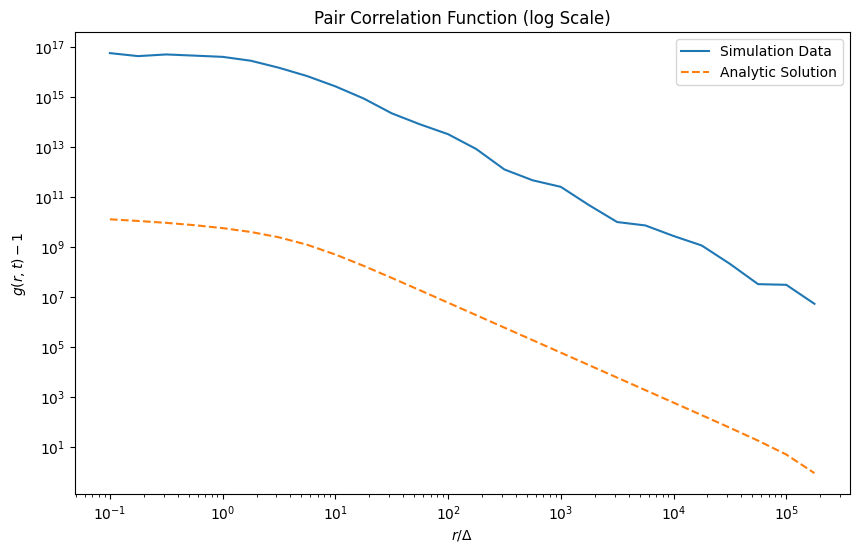

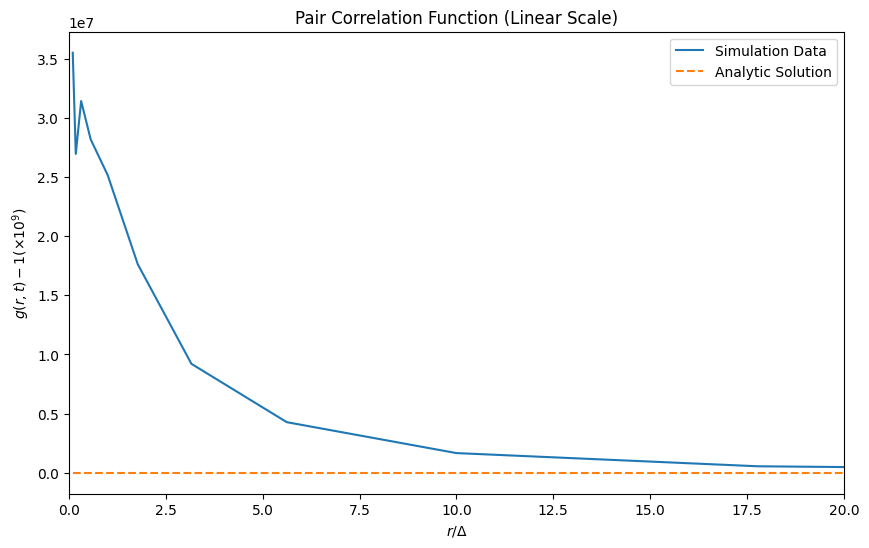

In [48]:
# Subtract 1 from pcf_dx_list for y-axis
plot_pcf_dx_list = (np.array(pcf_dx_list) - 1)
plot_pcf_dp_list = (np.array(pcf_dp_list) - 1) / 10**9

plt.figure(figsize=(10, 6))
plt.loglog(radii, plot_pcf_dx_list, label='Simulation Data')
plt.loglog(radii, g_test, '--', label='Analytic Solution')
plt.xlabel(r'$r / \Delta$')
plt.ylabel(r'$g(r, t) - 1$')
plt.title('Pair Correlation Function (log Scale)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(radii, plot_pcf_dp_list, label='Simulation Data')
plt.plot(radii, g_test/10**9, '--', label='Analytic Solution')
plt.xlim(0, 20)
plt.xlabel(r'$r / \Delta$')
plt.ylabel(r'$g(r, t) - 1 (\times 10^{9})$')
plt.title('Pair Correlation Function (Linear Scale)')
plt.legend()
plt.show()

## With rescaling:

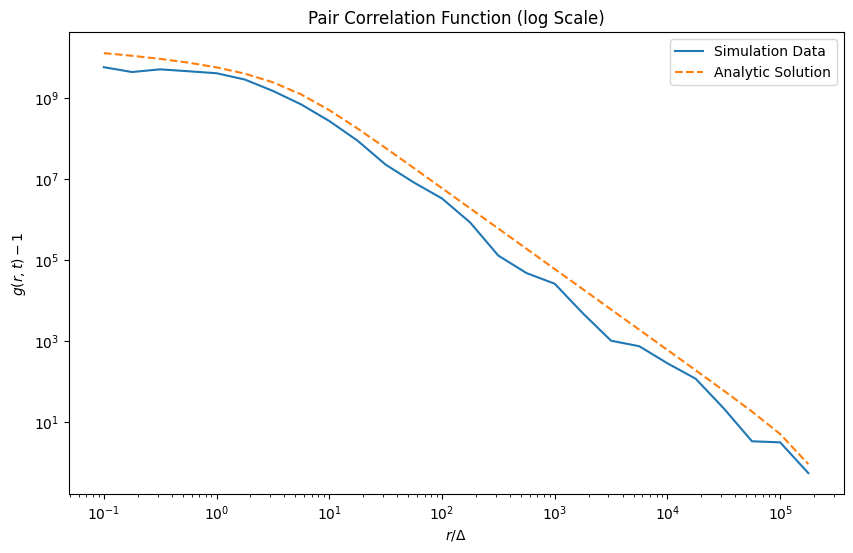

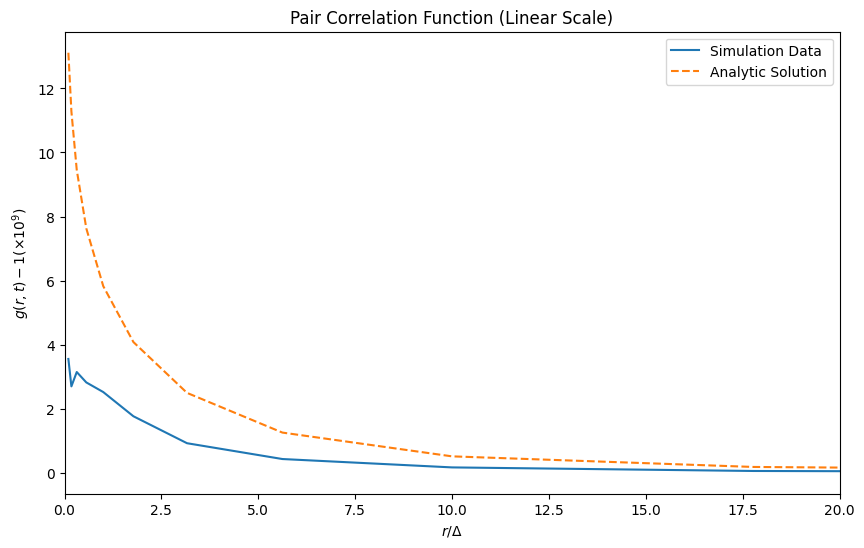

In [46]:
# Subtract 1 from pcf_dx_list for y-axis
plot_pcf_dx_list = (np.array(pcf_dx_list) - 1) / 10**7
plot_pcf_dp_list = (np.array(pcf_dp_list) - 1) / 10**16

plt.figure(figsize=(10, 6))
plt.loglog(radii, plot_pcf_dx_list, label='Simulation Data')
plt.loglog(radii, g_test, '--', label='Analytic Solution')

plt.xlabel(r'$r / \Delta$')
plt.ylabel(r'$g(r, t) - 1$')
plt.title('Pair Correlation Function (log Scale)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(radii, plot_pcf_dp_list, label='Simulation Data')
plt.plot(radii, g_test/10**9, '--', label='Analytic Solution')
plt.xlim(0, 20)
plt.xlabel(r'$r / \Delta$')
plt.ylabel(r'$g(r, t) - 1 (\times 10^{9})$')
plt.title('Pair Correlation Function (Linear Scale)')
plt.legend()
plt.show()